In [50]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="-1" # staviti -1 za CPU
os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'

# import the needed libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# config
img_width, img_height = 28,28 #width & height of input image
input_depth = 1 #1: gray image

train_data_dir = 'TrainingSamoFra' #data training path

epochs = 20 #number of training epoch
batch_size = 10 #training batch size


list=[]
import os, shutil
for item in os.listdir(train_data_dir):
    s = os.path.join(train_data_dir, item)
    list.append(item)


# define image generator for Keras,
# here, we map pixel intensity to 0-1
train_datagen = ImageDataGenerator(rescale=1/255)


# read image batch by batch
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',#inpput iameg: gray
    target_size=(img_width,img_height),#input image size
    batch_size=batch_size,#batch size
    class_mode='categorical')#categorical: one-hot encoding format class label

Found 2058 images belonging to 8 classes.


In [51]:
testing_data_dir = 'Test/TestFra' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')

Found 122 images belonging to 8 classes.


In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_36 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_42 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_37 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_43 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_18 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                 

In [53]:
import os
import random
from tensorflow.keras.preprocessing.image import ImageDataGenerator


testing_data_dir = 'Test/TestFra'




all_images = os.listdir(testing_data_dir)


num_validation_images = int(len(all_images) * 0.3)


validation_indices = random.sample(range(len(all_images)), num_validation_images)


test_datagen = ImageDataGenerator(
    rescale=1/255,
    validation_split=0.3
)


test_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  
)


validation_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation' 
)


FraFra = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
)


evaluacija_rezultati = model.evaluate(test_generator, steps=len(test_generator))
print("Rezultati evaluacije:", evaluacija_rezultati)


najbolji_test_rezultat = max(FraFra.history['val_accuracy'])

print("Najbolji val_točnost:", najbolji_test_rezultat)
evaluacija_rezultati = model.evaluate(test_generator, steps=len(test_generator))
print("Rezultati evaluacije:", evaluacija_rezultati)


najbolji_test_rezultat = evaluacija_rezultati[1]
print("Najbolji rezultat za testiranje:", najbolji_test_rezultat)

Epoch 1/25


/tmp/ipykernel_2848468/3413538668.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  FraFra = model.fit_generator(


206/206 [==============================] - 5s 21ms/step - loss: 0.6430 - accuracy: 0.8134 - val_loss: 2.5696 - val_accuracy: 0.2167
Epoch 2/25
206/206 [==============================] - 4s 20ms/step - loss: 0.1582 - accuracy: 0.9509 - val_loss: 1.3492 - val_accuracy: 0.6333
Epoch 3/25
206/206 [==============================] - 4s 21ms/step - loss: 0.0811 - accuracy: 0.9718 - val_loss: 0.3545 - val_accuracy: 0.8833
Epoch 4/25
206/206 [==============================] - 4s 19ms/step - loss: 0.0892 - accuracy: 0.9723 - val_loss: 0.1155 - val_accuracy: 0.9667
Epoch 5/25
206/206 [==============================] - 4s 19ms/step - loss: 0.0135 - accuracy: 0.9961 - val_loss: 0.0088 - val_accuracy: 1.0000
Epoch 6/25
206/206 [==============================] - 4s 19ms/step - loss: 0.0370 - accuracy: 0.9917 - val_loss: 0.0927 - val_accuracy: 0.9667
Epoch 7/25
206/206 [==============================] - 4s 20ms/step - loss: 0.0602 - accuracy: 0.9825 - val_loss: 0.1378 - val_accuracy: 0.9667
Epoch 8/25

In [54]:
best_val_accuracy_Fra = max(FraFra.history['val_accuracy'])
print('val: ', best_val_accuracy_Fra)


test_loss_fra, test_accuracy_fra = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_fra)
print("Test Accuracy:", test_accuracy_fra)

val:  1.0
13/13 [==============================] - 0s 7ms/step - loss: 0.0116 - accuracy: 1.0000
Test Loss: 0.011608784087002277
Test Accuracy: 1.0


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


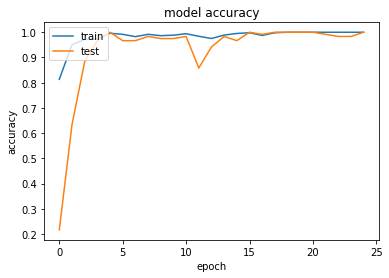

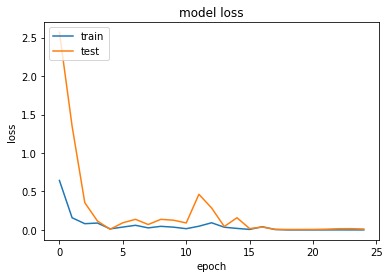

In [55]:
#Fra + Fra
# list all data in history
print(FraFra.history.keys())
# summarize history for accuracy
plt.plot(FraFra.history['accuracy'])
plt.plot(FraFra.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(FraFra.history['loss'])
plt.plot(FraFra.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [56]:
#testing_data_dir = 'TestSamoZaFrancusku/Test/TestGer' #data testing path
testing_data_dir = 'Test/TestGer' #data testing path
test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()



Found 2928 images belonging to 8 classes.
Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_42 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_49 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_43 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_50 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_21 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)       

In [ ]:
#Fra + Ger
import matplotlib.pyplot as plt
FraGer = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

best_val_accuracy_Ger = max(FraGer.history['val_accuracy'])
print('val: ', best_val_accuracy_Ger)


test_loss_ger, test_accuracy_ger = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_ger)
print("Test Accuracy:", test_accuracy_ger)

#Fra + Ger
# list all data in history
print(FraGer.history.keys())
# summarize history for accuracy
plt.plot(FraGer.history['accuracy'])
plt.plot(FraGer.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(FraGer.history['loss'])
plt.plot(FraGer.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/25


/tmp/ipykernel_2848468/4251054021.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  FraGer = model.fit_generator(


206/206 [==============================] - 7s 30ms/step - loss: 0.6199 - accuracy: 0.8154 - val_loss: 2.4836 - val_accuracy: 0.2795
Epoch 2/25
206/206 [==============================] - 6s 27ms/step - loss: 0.1176 - accuracy: 0.9602 - val_loss: 1.9618 - val_accuracy: 0.4784
Epoch 3/25
206/206 [==============================] - 6s 27ms/step - loss: 0.0747 - accuracy: 0.9747 - val_loss: 2.9720 - val_accuracy: 0.5397
Epoch 4/25
206/206 [==============================] - 6s 28ms/step - loss: 0.0415 - accuracy: 0.9869 - val_loss: 5.5731 - val_accuracy: 0.4558
Epoch 5/25
206/206 [==============================] - 6s 28ms/step - loss: 0.0580 - accuracy: 0.9820 - val_loss: 4.9003 - val_accuracy: 0.4510
Epoch 6/25
206/206 [==============================] - 6s 28ms/step - loss: 0.0700 - accuracy: 0.9796 - val_loss: 5.4393 - val_accuracy: 0.5469
Epoch 7/25
206/206 [==============================] - 6s 28ms/step - loss: 0.0373 - accuracy: 0.9869 - val_loss: 4.7330 - val_accuracy: 0.5678
Epoch 8/25

In [35]:
testing_data_dir = 'Test/TestBel' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 474 images belonging to 8 classes.
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_21 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_22 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)         

Epoch 1/25


/tmp/ipykernel_2848468/2882514524.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  FraBel = model.fit_generator(


89/89 [==============================] - 3s 24ms/step - loss: 0.9611 - accuracy: 0.7528 - val_loss: 2.3493 - val_accuracy: 0.0830
Epoch 2/25
89/89 [==============================] - 2s 22ms/step - loss: 0.1213 - accuracy: 0.9626 - val_loss: 2.3565 - val_accuracy: 0.3191
Epoch 3/25
89/89 [==============================] - 2s 25ms/step - loss: 0.0731 - accuracy: 0.9762 - val_loss: 1.4732 - val_accuracy: 0.4234
Epoch 4/25
89/89 [==============================] - 2s 23ms/step - loss: 0.0405 - accuracy: 0.9921 - val_loss: 1.6300 - val_accuracy: 0.5617
Epoch 5/25
89/89 [==============================] - 2s 22ms/step - loss: 0.0117 - accuracy: 0.9955 - val_loss: 0.9065 - val_accuracy: 0.8043
Epoch 6/25
89/89 [==============================] - 2s 26ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.7062 - val_accuracy: 0.8723
Epoch 7/25
89/89 [==============================] - 2s 23ms/step - loss: 4.6448e-04 - accuracy: 1.0000 - val_loss: 0.6373 - val_accuracy: 0.8787
Epoch 8/25
89/89 [==

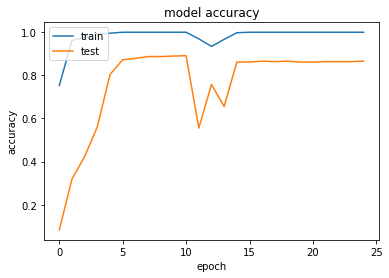

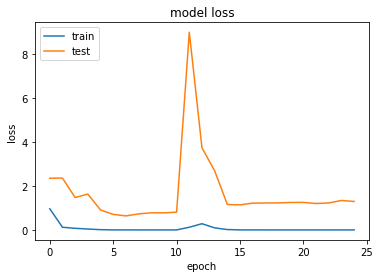

In [36]:
#Fra + Bel
import matplotlib.pyplot as plt
FraBel = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

best_val_accuracy_Bel = max(FraBel.history['val_accuracy'])
print('val: ', best_val_accuracy_Bel)


test_loss_bel, test_accuracy_bel = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_bel)
print("Test Accuracy:", test_accuracy_bel)

#Fra + Bel
# list all data in history
print(FraBel.history.keys())
# summarize history for accuracy
plt.plot(FraBel.history['accuracy'])
plt.plot(FraBel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(FraBel.history['loss'])
plt.plot(FraBel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [37]:
testing_data_dir = 'Test/TestSwe' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 498 images belonging to 8 classes.
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_28 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_25 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_29 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_12 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)        

Epoch 1/50


/tmp/ipykernel_2848468/1841933808.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  FraSwe = model.fit_generator(


89/89 [==============================] - 3s 25ms/step - loss: 0.8578 - accuracy: 0.7676 - val_loss: 3.6554 - val_accuracy: 0.0469
Epoch 2/50
89/89 [==============================] - 2s 21ms/step - loss: 0.1447 - accuracy: 0.9524 - val_loss: 4.6819 - val_accuracy: 0.0449
Epoch 3/50
89/89 [==============================] - 2s 23ms/step - loss: 0.0829 - accuracy: 0.9717 - val_loss: 2.8248 - val_accuracy: 0.1510
Epoch 4/50
89/89 [==============================] - 2s 24ms/step - loss: 0.0228 - accuracy: 0.9943 - val_loss: 5.2801 - val_accuracy: 0.1143
Epoch 5/50
89/89 [==============================] - 2s 24ms/step - loss: 0.0090 - accuracy: 0.9966 - val_loss: 4.5506 - val_accuracy: 0.2061
Epoch 6/50
89/89 [==============================] - 2s 23ms/step - loss: 0.0124 - accuracy: 0.9966 - val_loss: 2.0652 - val_accuracy: 0.6041
Epoch 7/50
89/89 [==============================] - 2s 23ms/step - loss: 0.0065 - accuracy: 0.9966 - val_loss: 1.7151 - val_accuracy: 0.6755
Epoch 8/50
89/89 [======

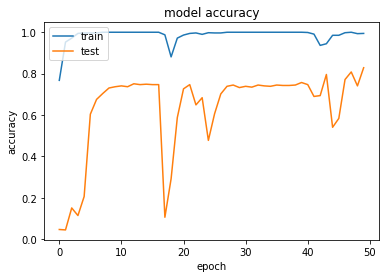

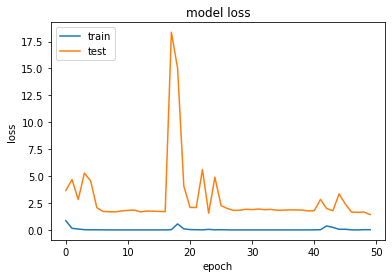

In [38]:
#Fra + Swe
import matplotlib.pyplot as plt
FraSwe = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

best_val_accuracy_Swe = max(FraSwe.history['val_accuracy'])
print('val: ', best_val_accuracy_Swe)


test_loss_swe, test_accuracy_swe = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_swe)
print("Test Accuracy:", test_accuracy_swe)

#Fra + Swe
# list all data in history
print(FraSwe.history.keys())
# summarize history for accuracy
plt.plot(FraSwe.history['accuracy'])
plt.plot(FraSwe.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(FraSwe.history['loss'])
plt.plot(FraSwe.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [39]:
testing_data_dir = 'Test/TestCro' #data testing path

test_datagen = ImageDataGenerator(rescale=1/255)


testing_generator = test_datagen.flow_from_directory(
    testing_data_dir,
    color_mode='grayscale',
    target_size=(img_width,img_height),
    batch_size=batch_size,
    class_mode='categorical')


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define number of filters and nodes in the fully connected layer
NUMB_FILTER_L1 = 32
NUMB_FILTER_L2 = 64
NUMB_FILTER_L3 = 128
NUMB_NODE_FC_LAYER = 256

# Define input image order shape
input_shape_val = (img_width, img_height, input_depth)

# Define the network
model = Sequential()

# Layer 1
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), input_shape=input_shape_val, padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L1, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 2
model.add(MaxPool2D((2, 2)))

# Layer 3
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L2, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 4
model.add(MaxPool2D((2, 2)))

# Layer 5
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(NUMB_FILTER_L3, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization())

# Layer 6
model.add(MaxPool2D((2, 2)))

# Flattening the model for fully connected layer
model.add(Flatten())

# Fully connected layer
model.add(Dense(NUMB_NODE_FC_LAYER))
model.add(Activation('relu'))

# Output layer
model.add(Dense(train_generator.num_classes, activation='softmax'))

# Define the optimizer
optimizer = Adam(learning_rate=1e-3)

# Compile the network
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Show the model summary
model.summary()


Found 634 images belonging to 8 classes.
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 activation_35 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 activation_36 (Activation)  (None, 28, 28, 32)        0         
                                                                 
 batch_normalization_15 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)        

Epoch 1/50


/tmp/ipykernel_2848468/854648139.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  FraCro = model.fit_generator(


89/89 [==============================] - 4s 33ms/step - loss: 0.9423 - accuracy: 0.7381 - val_loss: 2.2656 - val_accuracy: 0.2794
Epoch 2/50
89/89 [==============================] - 2s 23ms/step - loss: 0.2026 - accuracy: 0.9410 - val_loss: 2.9410 - val_accuracy: 0.2714
Epoch 3/50
89/89 [==============================] - 2s 23ms/step - loss: 0.1670 - accuracy: 0.9410 - val_loss: 2.2722 - val_accuracy: 0.3651
Epoch 4/50
89/89 [==============================] - 2s 26ms/step - loss: 0.0761 - accuracy: 0.9773 - val_loss: 2.1661 - val_accuracy: 0.4333
Epoch 5/50
89/89 [==============================] - 2s 23ms/step - loss: 0.0217 - accuracy: 0.9909 - val_loss: 1.3373 - val_accuracy: 0.6587
Epoch 6/50
89/89 [==============================] - 2s 23ms/step - loss: 0.0047 - accuracy: 0.9977 - val_loss: 0.8619 - val_accuracy: 0.7810
Epoch 7/50
89/89 [==============================] - 2s 24ms/step - loss: 3.6495e-04 - accuracy: 1.0000 - val_loss: 0.8353 - val_accuracy: 0.8444
Epoch 8/50
89/89 [==

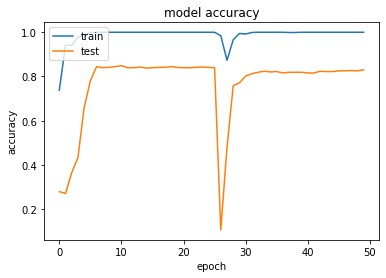

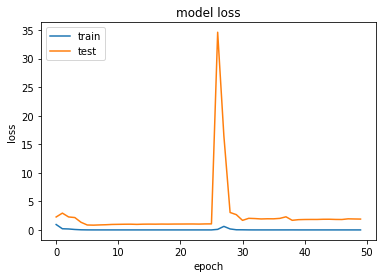

In [40]:
#Fra + Cro
import matplotlib.pyplot as plt
FraCro = model.fit_generator(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator,
    steps_per_epoch=len(train_generator),
    validation_steps=len(validation_generator)
    )

best_val_accuracy_Cro = max(FraCro.history['val_accuracy'])
print('val: ', best_val_accuracy_Cro)


test_loss_cro, test_accuracy_cro = model.evaluate(testing_generator, steps=np.ceil(testing_generator.n / batch_size))

print("Test Loss:", test_loss_cro)
print("Test Accuracy:", test_accuracy_cro)

#Fra + Cro
# list all data in history
print(FraCro.history.keys())
# summarize history for accuracy
plt.plot(FraCro.history['accuracy'])
plt.plot(FraCro.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(FraCro.history['loss'])
plt.plot(FraCro.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
import pandas as pd

best_results = []


best_results.append({'Model': 'FraFra', 'Best Val_Accuracy': best_val_accuracy_Fra, 'Best Test Accuracy':test_accuracy_fra})
best_results.append({'Model': 'FraGer', 'Best Val_Accuracy': best_val_accuracy_Ger, 'Best Test Accuracy':test_accuracy_ger})
best_results.append({'Model': 'FraBel', 'Best Val_Accuracy': best_val_accuracy_Bel, 'Best Test Accuracy':test_accuracy_bel})
best_results.append({'Model': 'FraSwe', 'Best Val_Accuracy': best_val_accuracy_Swe, 'Best Test Accuracy':test_accuracy_swe})
best_results.append({'Model': 'FraCro', 'Best Val_Accuracy': best_val_accuracy_Cro, 'Best Test Accuracy':test_accuracy_cro})
df = pd.DataFrame(best_results)
print(df)   

    Model  Best Val_Accuracy  Best Test Accuracy
0  FraFra           1.000000            1.000000
1  FraGer           0.612329            0.606216
2  FraBel           0.891489            0.864979
3  FraSwe           0.828571            0.829317
4  FraCro           0.849206            0.828076
